<a href="https://colab.research.google.com/github/chhitij/data-science-ml/blob/main/DL/Copy_of_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout,Conv2D, MaxPool2D, Flatten
import matplotlib.pyplot as plt


In [ ]:
# loading a dataset 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
#(number_of_images, height, width,channel)
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
# naming all the classes
classes = ['airplane',
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck']

'ship'

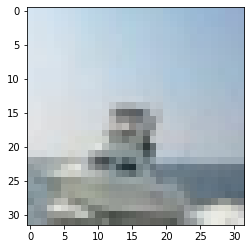

In [ ]:
#visualising all the classes
class_number = 100
plt.imshow(X_train[class_number])
classes[y_train[class_number][0]]

In [ ]:
# NOrmalising the data

X_train , X_test =  X_train/255.0 , X_test/255.0

In [ ]:
# Training 

# 1> model building 
# 2> compilation
# 3> training fit

In [ ]:
# model building 

model = Sequential()

# conv layer 1
model.add(Conv2D(36,(3,3),activation='relu',kernel_initializer='he_uniform'))
# stride will be 3 if matrix size is 3*3
model.add(MaxPool2D())


# conv layer 2
model.add(Conv2D(72,(3,3),activation='relu',kernel_initializer='he_uniform'))
# stride will be 3 if matrix size is 3*3
model.add(MaxPool2D())


# conv layer 3
model.add(Conv2D(144,(3,3),activation='relu',kernel_initializer='he_uniform'))
# stride will be 3 if matrix size is 3*3
model.add(MaxPool2D())


model.add(Flatten())

# fully connected layer

#hiddem layer 1
model.add(Dense(128, activation="relu", kernel_initializer='he_uniform'))
model.add(Dropout(0.1))

#hiddem layer 2
model.add(Dense(64,activation='sigmoid'))
model.add(Dropout(0.1))

#hiddem layer 3
model.add(Dense(32,activation='relu' ,kernel_initializer='he_uniform'))
model.add(Dropout(0.1))


# ouptou layer
model.add(Dense(10,activation='softmax'))




In [ ]:
# Compile
model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
# filt 
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
1563/1563 [==============================] - 38s 4ms/step - loss: 1.6179 - accuracy: 0.4011
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1915 - accuracy: 0.5778
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0038 - accuracy: 0.6480
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8769 - accuracy: 0.6982
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7847 - accuracy: 0.7326
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7118 - accuracy: 0.7569
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6406 - accuracy: 0.7835
Epoch 8/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5928 - accuracy: 0.7991
Epoch 9/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5324 - accuracy: 0.8205
Epoch 10/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.49

In [ ]:
## whenever your target variable is in label encoding format - sparse_categorical_crossentropy

## whenever your target variable is  one hot encoding format -  categorical_crossentropy

In [ ]:
# casse is overfitting because testing data is prediction is low and tarining is high
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4123 - accuracy: 0.7100


[1.4123218059539795, 0.7099999785423279]

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
class_number = 2

In [ ]:
classes[np.argmax(y_pred[class_number])]

'automobile'